In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio


*Analizaremos un dataset que contiene los salarios anuales, por disciplina dentro IA o el mundo de los datos, fuente kaggle*

In [4]:
df = pd.read_csv('/content/ds_salaries.csv')

In [5]:
df = df.drop(["Unnamed: 0"], axis = 1)


In [6]:
df.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S


*Informacion sobre como esta compuesto nuestro Dataset*

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


*Cantidad de datos diferentes dentro de nuestras filas por cada columna de nuestro dataset*

In [8]:
df.nunique()

work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

*Lista de datos unicos dentro de la columna job_title*

In [9]:
df['job_title'].unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

*Veamos informacion importante de las variables numericas de nuestro dataset a las cuales se le aplican las formulas matemasticas mas relevantes para tener una panoramica de los datos que estamos trabajando.*

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,607.0,2021.405272,6.921330e-01,2020.0,2021.0,2022.0,2022.0,2022.0
salary,607.0,324000.062603,1.544357e+06,4000.0,70000.0,115000.0,165000.0,30400000.0
salary_in_usd,607.0,112297.869852,7.095726e+04,2859.0,62726.0,101570.0,150000.0,600000.0
remote_ratio,607.0,70.922570,4.070913e+01,0.0,50.0,100.0,100.0,100.0


*Correlacion entre variables en un rango de 0 y 1 donde entre mas cerca esten de 1 es porque una variable tiene una relacion directa con respecto a otra, es decir que una variable afecta directamente el valor de la otra*

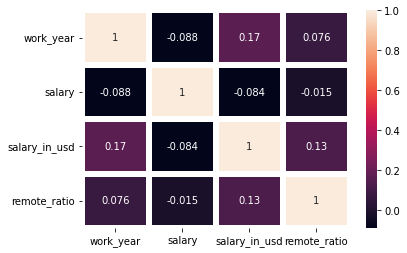

In [45]:
sns.heatmap(df.corr(), annot=True, linewidths=5)
plt.show()

In [11]:
df.corr()

,work_year,salary,salary_in_usd,remote_ratio
work_year,1.000000,-0.087577,0.170493,0.076314
salary,-0.087577,1.000000,-0.083906,-0.014608
salary_in_usd,0.170493,-0.083906,1.000000,0.132122
remote_ratio,0.076314,-0.014608,0.132122,1.000000


*Verificamos si tenemos filas con valores nulos y aplicamos conteo para tener un registro en caso de que existan*

In [12]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

*Miramos un histograma para saber los puntos de mayor concentracion de los datos en nuestras variables*

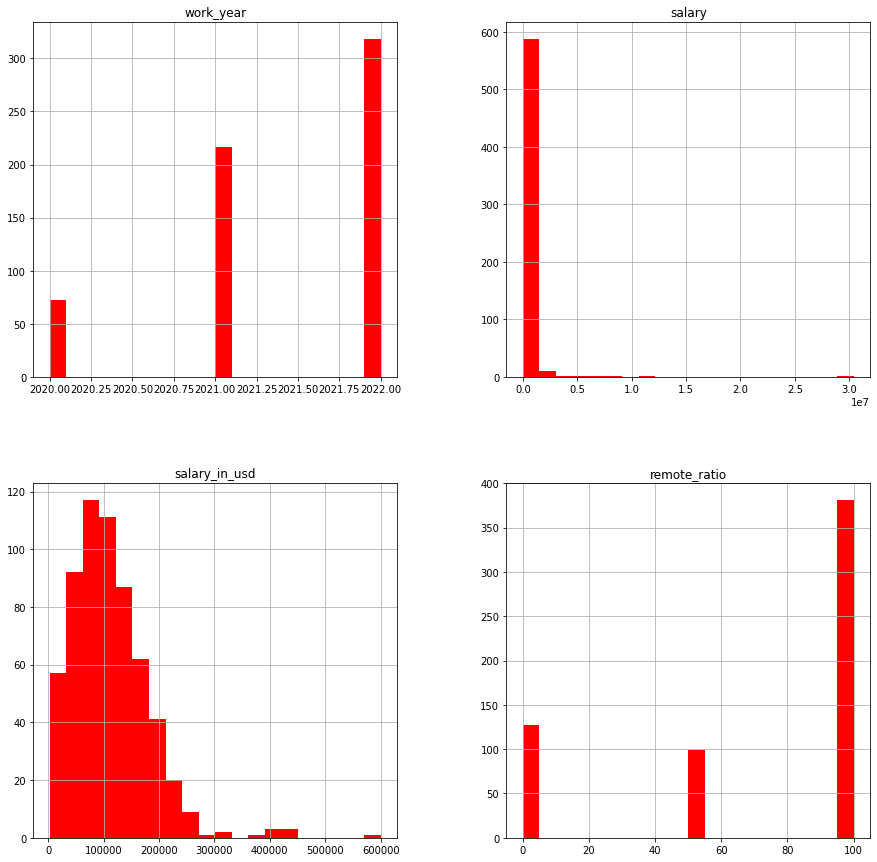

In [13]:
v_numericas = df.hist(bins=20, figsize= (15,15), color= 'red')
plt.savefig('hist.png')

Como vista preeliminar del Histograma podemos observar los siguientes puntos:



1.   Hubo crecimiento de ocupacion de vacantes cada año
2.   Los salarios estan alrredor los 100K, como punto de mayor concentracion.


3.   Hay mayor acumulacion de datos en el rango de trabajo remoto









In [14]:
x = df['job_title'].unique()

In [15]:
from pandas.io.formats.style_render import DataFrame
df2 = DataFrame(x, columns=['job_title'])

*Creamos un nuevo Data Frames de nombre df2, con todos los titulos de trabajo de manera unica sin repeticiones.*

In [16]:
df2.head(2)

,job_title
0,Data Scientist
1,Machine Learning Scientist


*Verifiquemos la info del nuevo Data Frames df2*

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job_title  50 non-null     object
dtypes: object(1)
memory usage: 528.0+ bytes


*Contemos la cantidad de veces que se repite en nuestro DF principal cada variable y visualicemos las primeras 4 y mas importante para nuestro analisis.*

In [18]:
df['job_title'].value_counts().head(4)

Data Scientist               143
Data Engineer                132
Data Analyst                  97
Machine Learning Engineer     41
Name: job_title, dtype: int64

En este punto ya tenemos un DF2 que almacena las job_title sin repeticiones, ahora queremos crea un nuevo DF3 con contenga la info del df2  mas una nueva columna que almacene el total de veces que ese job_title aparece en el data frame principal, ese numero representa a la cantidad de personas con ese cargo en nuestra data.

In [26]:
job_title_conteo = []
for i in df2['job_title']:
  a = (df.job_title == i).sum()
  job_title_conteo.append(a)
job_title_conteo = pd.DataFrame(job_title_conteo, columns= ['job_title_conteo'])
df3 = df2.assign(Total = job_title_conteo)
df3
df3 = df3.sort_values(by='Total', ascending=False)
df3.head(4)

,job_title,Total
0,Data Scientist,143
10,Data Engineer,132
5,Data Analyst,97
4,Machine Learning Engineer,41


Miremos un grafico de barras para visualizar mejor la diferencia que hay entre cada disciplina (job_title) segun el numero de personas que ocupan ese cargo en nuestro dataset

In [ ]:
fig = px.bar(df3, x= 'job_title', y='Total')
fig.show()

Visualicemos esto filtrando por las principales disciplinas de IA o Data que es donde estan concentrado la mayoria de los datos, para eso creamos una lista con las principales disciplinas para luego filtrar el df principal y que nos muestre solo la info de las disciplinas o cargos siempre y cuando sean iguales a los especificados en nuestra lista, graficamos y asignamos de color de barras la informacion de la columna seniority para cada disciplina lo que nos mostrara visualmente  la porcion de cada seniority por disciplina.

In [28]:
principal_jobs = ['Data Scientist', 'Data Engineer', 'Data Analyst', 'Machine Learning Engineer']

In [29]:
df_job_filtrados = df[df['job_title'].isin(principal_jobs)]

In [30]:
df_job_filtrados = df_job_filtrados.reset_index(drop=True)

In [32]:
fig = px.histogram(df_job_filtrados, x = 'job_title', title = 'Distribucion de disciplinas por seniority', color = 'experience_level')
fig.update_layout(bargap=0.2)
fig.show()

In [33]:
principal_jobs

['Data Scientist',
 'Data Engineer',
 'Data Analyst',
 'Machine Learning Engineer']

En este punto queremos obtener los diefrentes salarios por las principales disciplinas, crearemos un dataframe con el promedio, maximo y minimo salario por cada disciplina.

Creamos 3 listas vacias y vamos a iterar en la lista de principal_jobs y crearemos variables que almacenaran los valores q corresponden para eso en cada iteracion compararemos q el valor de la iteracion sea el mismo al de la columna job_title del DF principal y cada vez que lo sea tomaremos de su columna de salarios un promedio, max y minimo, estas variables creadas ocuparan la lista vacia que corresponde.

In [36]:
average = []
salary_max = []
salary_min = []

for each in principal_jobs:
  mean_value = int(df[(df.job_title == each)].salary_in_usd.mean())
  max_value = df[(df.job_title == each)].salary_in_usd.max()
  min_value = df[(df.job_title == each)].salary_in_usd.min()
  average.append(mean_value)
  salary_max.append(max_value)
  salary_min.append(min_value)

Crearemos dataframes con la info que almacenan las listas que vimos anteriormente 1 df por cada lista que luego uniremos en solo dataframes llamada job_title

In [37]:
average = pd.DataFrame(average, columns= ['Average_salary'])
salary_max = pd.DataFrame(salary_max, columns= ['Salary_max'])
salary_min = pd.DataFrame(salary_min, columns=['Salary_min'])
job_title = pd.DataFrame(principal_jobs, columns=['Job_Title'])

Ya creado el dataframes que unira los dataframes que almacenaron los valores de las listas procedemos a unirlos, al df job_title se le asignaran nuevas columnas que contendran los valores de los df creados

In [38]:
job_title = job_title.assign(Average=average, Max_Salary=salary_max, Min_Salary=salary_min)
job_title

,Job_Title,Average,Max_Salary,Min_Salary
0,Data Scientist,108187,412000,2859
1,Data Engineer,112725,324000,4000
2,Data Analyst,92893,200000,6072
3,Machine Learning Engineer,104880,250000,20000


In [39]:
job_title = job_title.sort_values(by='Average', ascending=False)

In [40]:
job_title

,Job_Title,Average,Max_Salary,Min_Salary
1,Data Engineer,112725,324000,4000
0,Data Scientist,108187,412000,2859
3,Machine Learning Engineer,104880,250000,20000
2,Data Analyst,92893,200000,6072


Graficaremos en barras los salarios por disciplina tomando en cuenta como eje vertical el promedio, tambien podriamos graficar por salario minio o maximo.

In [42]:
fig = px.bar(job_title, title='Promedio de Salarios', x = 'Job_Title', y = 'Average')
fig.show()

In [ ]:
df3

,job_title,Total
0,Data Scientist,143
10,Data Engineer,132
5,Data Analyst,97
4,Machine Learning Engineer,41
14,Research Scientist,16
22,Data Science Manager,12
39,Data Architect,11
2,Big Data Engineer,8
1,Machine Learning Scientist,8
21,Principal Data Scientist,7


Realizaremos un Data Frames limpio con los principal jobs tomando como referencia el DF3

In [ ]:
principal_jobs  = ['Data Scientist', 'Data Analyst', 'Data Engineer', 'Machine Learning Engineer']
job_porcent = df3[df3['job_title'].isin(principal_jobs)]
job_porcent = job_porcent.reset_index(drop=True)
job_porcent

,job_title,Total
0,Data Scientist,143
1,Data Engineer,132
2,Data Analyst,97
3,Machine Learning Engineer,41


Graficaremos este dataframes que llamamos job_porcent porque sera visualizado en un grafico tipo pie para ver como estan distribuidos los datos por disciplina en porcentaje para eso el atributo values debe almacenar los totale y nombre lo que estamos graficando para que sea diferenciado por color en nuestro grafico.

In [ ]:
fig = px.pie(job_porcent, title = "Estructura del team data", names='job_title',values='Total')
fig.show()

Veamos nuestras variables de salarios promedio, minimo y maximo agrupados por cada disciplina en un grafico

In [ ]:
import plotly.graph_objects as go
job_title

fig = go.Figure(data=[
    go.Bar(name='Average', x=job_title["Job_Title"], y=job_title["Average"]),
    go.Bar(name='Max_Salary', x=job_title["Job_Title"], y=job_title["Max_Salary"]),
    go.Bar(name='Min_Salary', x=job_title["Job_Title"], y=job_title["Min_Salary"])
])

fig.update_layout(barmode='group')
fig.show()

:

**Conclusiones**


1.   El salario en usd y trabajo remoto tienen una correlacion directa, es decir el salario depende de si es remoto o no, por lo que se debe considerar una con respecto a la otra a la hora de tomar una decision en base este factor.


2.   Los puestos de trabajo en Data aumentaron considerablemente cada año entre el 2020 y 2022, teniendo el año presente mas contrataciones que el anterior.



3.   La mayoria de los puestos de trabajo estan siendo ocupados por un salario de 100K


4.   Las disciplinas con mas contrataciones son: Data Science 34.6%, Data Engineer 32%, Data Analyst 23,5% y Machine learning 9.93%



5.   Data Science es la displina con mayor contratacion de perfiles Jr y Mid y Machine Learning la que menos contrataciones tiene en general y a su vez las contrataciones  de  Jr  y Mid  son considerablemente mas bajas que las de senior.


6.   Data Engineer tiene la mayor contratacion para perfiles senior.

7. Data Enginner tiene el promedio salarial mas alto 112k y Data analyst el mas bajo  92K entre las 4 disciplinas discutidas.


8.  Salario maximo mas alto: Data Science

9.  Salario promedio mas alto: Machine Learning


10. Salario minimo mas alto: Machine Learning.


    















